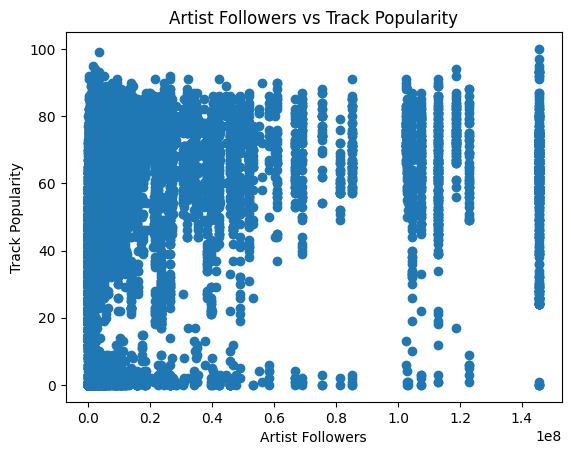

In [3]:
import pandas as pd

df = pd.read_csv("track_data_final.csv")

cols = [
    "track_name",
    "track_popularity",
    "artist_followers",
    "artist_popularity",
    "track_duration_ms",
    "artist_genres"
]

df = df[cols]

df = df.dropna(subset=[
    "track_popularity",
    "artist_followers",
    "artist_popularity"
])

df.head()

corr_followers = df["artist_followers"].corr(df["track_popularity"])
corr_followers

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    df["artist_followers"],
    df["track_popularity"]
)
plt.xlabel("Artist Followers")
plt.ylabel("Track Popularity")
plt.title("Artist Followers vs Track Popularity")
plt.show()

df["is_hit"] = df["track_popularity"] >= 80

df["is_hit"].value_counts()

hit_rate = df["is_hit"].mean()
hit_rate

def main_genre(genres):
    try:
        return eval(genres)[0]
    except:
        return "Unknown"

df["main_genre"] = df["artist_genres"].apply(main_genre)

genre_summary = (
    df.groupby("main_genre")
    .agg(
        total_tracks=("track_name", "count"),
        hit_rate=("is_hit", "mean"),
        avg_followers=("artist_followers", "mean")
    )
    .sort_values("hit_rate", ascending=False)
)

genre_summary.head(10)

df.to_csv("dataset_powerbi.csv", index=False)